## This notebook plots the KN lightcurves
This is for getting single plots of the SED outputs from the 'CreateSynthLightCurvesFromKasen2017'file.

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.cosmology import FlatLambdaCDM


In [50]:
z = 0.0099


## Read the data, sort it by filter

In [51]:
data = pd.read_csv('/Users/mwiesner/KDC/notebooks/output/sed_1.95.spec', sep=',')
#data2 = pd.read_csv('~/Exp.40E08.1Z.spec', delim_whitespace=True)

#for col in data.columns:
#    print(col)

#print(data['Llam'])
   # lam_ok = data.loc[data.index%5. ==0]['LAMBDA']
   # flux_ok = data.loc[data.index%5. ==0]['Llam']
    
lam_nm = data['LAMBDA']/10.
flux = data['Llam']

lam_ok = data.loc[data.index%20. ==0]['LAMBDA']/10.
flux_ok = data.loc[data.index%20. ==0]['Llam']

## Make the plots

In [52]:
cosmo = FlatLambdaCDM(H0=69.6, Om0=0.286)
dc = cosmo.comoving_distance(z)
dlum_mpc = (1+z)*dc    #in Mpc
dlum_cm =  3.086e+24 * (dlum_mpc)

Flam = flux / (4.*np.pi*(dlum_cm)**2. ) #Flam [ergs/s/cm2/Angstrom]
Flam_ok = flux_ok / (4.*np.pi*(dlum_cm)**2. ) #Flam [ergs/s/cm2/Angstrom]

Flim = Flam/(1E-17)
Flim_ok = Flam_ok/(1E-17)

print(max(Flim_ok))


20.52698677689652


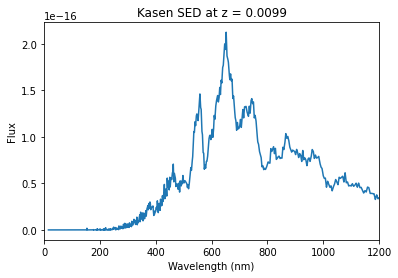

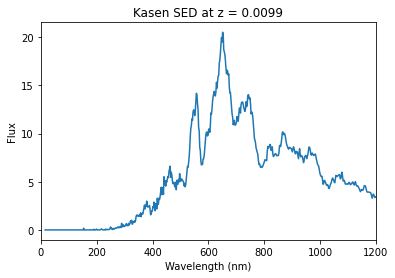

woof 5016 5016


In [53]:
scatter = plt.plot(lam_nm, Flam)
                                        #, '.g-') 
plt.title('Kasen SED at z = 0.0099')
plt.xlim([0., 1200.]) #PhoSim doesn't look beyond 1200 nm
#plt.ylim([0.,1.1])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux')
plt.show()


scatter = plt.plot(lam_ok, Flim_ok)                                        #, '.g-') 
plt.title('Kasen SED at z = 0.0099')
plt.xlim([0., 1200.]) #PhoSim doesn't look beyond 1200 nm
#plt.ylim([0.,1.1])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux')
plt.show()
print('woof', len(lam_ok), len(Flim_ok))

#scatter = plt.plot(data2['Wavelength'], data2['F_lam'])
                                        #, '.g-') 
#plt.title('PhoSim SED at z = 0.0099')
#plt.xlim([0., 1000.])
#plt.ylim([0.,1.1])
#plt.xlabel('Wavelength (nm)')
#plt.ylabel('Flux')
#plt.show()


## Output the data to a text file

In [54]:
#print(lam_nm)
#print(Flim)

#lam_nm.rename(index={0:"# Wavelength (nm)"})
#Flim.columns = '  F_lamA (normalized erg/cm2/s/A)'

#print(lam_nm)

#Flimm = Flim['Llam'].data.tolist()
#lamm_nm = lam_nm['LAMBDA'].data.tolist()
#print(lam_nm)
#print(datta)
#print(SED)
#print(SED)
#print(lam_nm)
#print(max(Flam))
#df = pd.DataFrame(SED, columns = ['# Wavelength (nm)', 'F_lamA (normalized erg/cm2/s/A)'])
#print(df)
pd.concat([lam_ok, Flim_ok], axis=1).to_csv('output/kasen.spec', header = ['# Wavelength (nm)' ,   'F_lamA (normalized erg/cm2/s/A)'], index = False, float_format='%g', sep=' ')
